In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
T = 4.0      # duration in seconds
sr = 22050   # sampling rate in Hertz
t = numpy.linspace(0, T, int(T*sr), endpoint=False)

In [3]:
amplitude = numpy.linspace(0, 1, int(T*sr), endpoint=False) # time-varying amplitude
x = amplitude*numpy.sin(2*numpy.pi*440*t)

In [4]:
ipd.Audio(x, rate=sr)

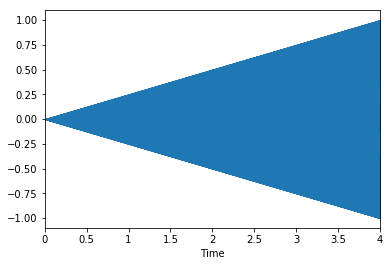

In [5]:
librosa.display.waveplot(x, sr=sr)

In [6]:
amplitude = numpy.logspace(-2, 0, int(T*sr), endpoint=False, base=10.0)
x = amplitude*numpy.sin(2*numpy.pi*440*t)

In [7]:
ipd.Audio(x, rate=sr)

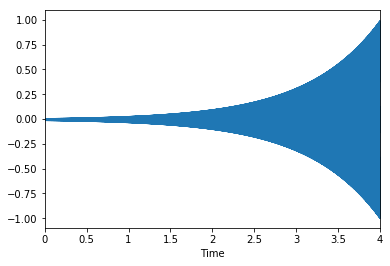

In [8]:
librosa.display.waveplot(x, sr=sr)

In [9]:
x, sr = librosa.load('audio/latin_groove.mp3', duration=8)
ipd.Audio(x, rate=sr)

In [10]:
X = librosa.stft(x)
X.shape

(1025, 345)

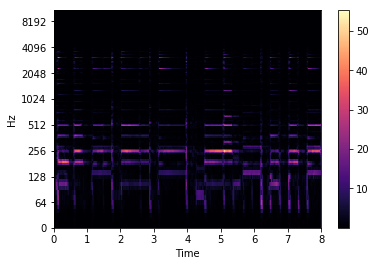

In [11]:
Xmag = abs(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

E:\Kameswar\Anaconda3\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


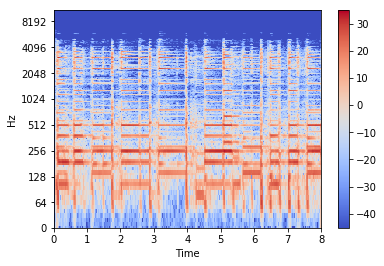

In [12]:
#librosa.logamplitude
Xmag = librosa.amplitude_to_db(X)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

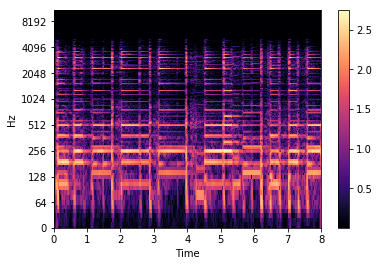

In [13]:
Xmag = numpy.log10(1+10*abs(X))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

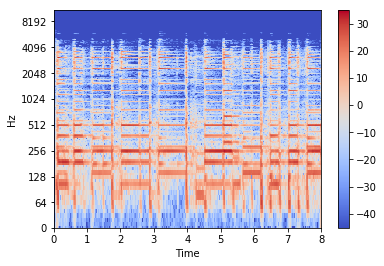

In [14]:
Xmag = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [15]:
freqs = librosa.core.fft_frequencies(sr=sr)

E:\Kameswar\Anaconda3\lib\site-packages\librosa\core\time_frequency.py:965: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3]))


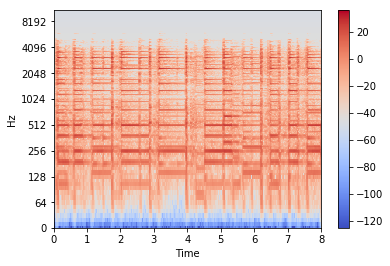

In [16]:
Xmag = librosa.perceptual_weighting(abs(X)**2, freqs)
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()